# Inventory problem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def find_demand_index(cumulative_list, random_number):
    n = len(cumulative_list)
    index = 0
    low = 0
    for i in range(0, n):
        high = round(cumulative_list[i]*100, 0)
        if (random_number >= low) and (random_number < high):
            index = i
        low = high
    return index

In [ ]:
def make_cumulative_list(probability_list):
    cumulative_list = []
    sum  = probability_list[0]
    n_len = len(probability_list)
    cumulative_list.append(sum)
    for i in range(1, n_len):
        sum = round(sum+ probability_list[i], 2)
        cumulative_list.append(sum)

    return cumulative_list

In [ ]:
# print("=================================================================================================")
# print("|\tDemand\t|\tProbability\t|\tCumulative Probability\t|\tRandom Range\t|")
# print("=================================================================================================")
# print("-------------------------------------------------------------------------------------------------")

|	Demand	|	Probability	|	Cumulative Probability	|	Random Range	|
-------------------------------------------------------------------------------------------------


In [ ]:
class INVENTORY:
    def __init__(self, M, N, start_with, Order_arival, order_quantity):
        self.M = M
        self.N = N #cycle days
        self.begining_inventory = start_with
        self.ending_inventory = 0
        self.shortage_quantity = 0
        self.order_quantity = order_quantity
        self.days_until_order_arrives = Order_arival
 
        #update here
        self.demand = [10, 15, 20, 25, 30] 
        self.demands_probability = [0.05, 0.25, 0.35, 0.25, 0.10]
        self.demands_probability_cumalitives = make_cumulative_list(self.demands_probability)
        self.demand_random_number = [52, 37, 82, 69, 98, 96, 33, 50]

        #update here
        self.lead_time = [1, 2]
        self.leads_time_probability = [0.42, 0.58]
        self.leads_time_probability_cumalitives = make_cumulative_list(self.leads_time_probability)
        self.leads_random_number = [50, 27, 45, 81, 66, 74, 30, 59] 
 
        self.ending_inventory_list = []
        self.sortage_inventory_list = []
        self.number_days_sortage = 0
        self.print_list = []

        self.demand_table()
        self.Lead_table()

    def demand_table(self):
        print("Demand Table")
        print("=================================================================================================")
        print("|\tDemand\t|\tProbability\t|\tCumulative Probability\t|\tRandom Range\t|")
        print("=================================================================================================")
        n = len(self.demands_probability)
        low = 0
        for i in range(0, n):
            print("|\t", self.demand[i] , end = "\t|\t")
            print( self.demands_probability[i] , end = "\t\t|\t")
            print("\t", self.demands_probability_cumalitives[i] , end = "\t\t|\t")
            high = int(round(self.demands_probability_cumalitives[i]*100, 0)) - 1
            print( low,"-", high , end = "\t\t|\t")
            low = high + 1
            if i != (n-1):
                print("\n-------------------------------------------------------------------------------------------------")
            else :
                print("\n=================================================================================================")
                print("\n\n\n\n")
    
    def Lead_table(self):
        print("Lead Time Table")
        print("=========================================================================================================")
        print("|\tLead Time\t|\tProbability\t|\tCumulative Probability\t|\tRandom Range\t|")
        print("=========================================================================================================")
        n = len(self.leads_time_probability)
        low = 0
        for i in range(0, n):
            print("|\t", self.lead_time[i] , end = "\t\t|\t")
            print( self.leads_time_probability[i] , end = "\t\t|\t")
            print("\t", self.leads_time_probability_cumalitives[i] , end = "\t\t|\t")
            high = int(round(self.leads_time_probability_cumalitives[i]*100, 0)) - 1
            print( low,"-", high , end = "\t\t|\t")
            low = high + 1
            if i != (n-1):
                print("\n---------------------------------------------------------------------------------------------------------")
            else :
                print("\n=========================================================================================================")
                print("\n\n\n\n")

 
    def simulation(self, cycle_range, total_days):
        # tabular style
        # print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        # print("|\tCycle\t|\tDay\t|\tBegnning inventory\t|\tDemand\t|\tEnding inventory\t|\tShortage quantity\t|\tOrder quantity\t|\tDays untill ordre arrives\t|")
        # print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("Inventory Table")
        print("=================================================================================================================================================================================================================================================================================")
        print("|\tCycle\t|\tDay\t|\tBegnning Inventory\t|\tRandom digit Demand\t|\tDemand\t|\tEnding Inventory\t|\tShortageQuantity\t|\tOrderQuantity\t|\tRandom digit LeadTime\t|\tDays untill ordre arrives\t|")
        print("=================================================================================================================================================================================================================================================================================")
        # np.random.seed(0) # seed 0
        count_day = 1 
        for cycle in range(1, cycle_range+1):
            #print("Cycle no:", cycle)
            for day in range(1, self.N + 1):
                self.print_list = []
                if day == 1 :
                    self.print_list.append(cycle)
                else:
                    self.print_list.append(" ")

                self.print_list.append(day)
                self.print_list.append(self.begining_inventory)

                self.days_until_order_arrives -= 1
                # daily_demand = np.random.choice(a = self.demand, p = self.demands_probability)
                random_number = self.demand_random_number.pop(0)
                index = find_demand_index(self.demands_probability_cumalitives, random_number)
                daily_demand = self.demand[index]
                self.print_list.append(random_number)
                self.print_list.append(daily_demand)
 
                total_demand = daily_demand + self.shortage_quantity
                if(total_demand > self.begining_inventory):
                    self.ending_inventory = 0
                    self.shortage_quantity = total_demand - self.begining_inventory
                    self.number_days_sortage += 1
                else:
                    self.ending_inventory = self.begining_inventory - total_demand
                    self.shortage_quantity = 0
 
                self.print_list.append(self.ending_inventory)
                self.print_list.append(self.shortage_quantity)

                self.sortage_inventory_list.append(self.shortage_quantity)
 
                #order place on every N days (Assingemnt Task - 1)
                if day == self.N:
                    #order place, order quantity
                    #randomly lead time / day untill order arrives
                    self.order_quantity =self.M - self.ending_inventory

                    #get the random number and get the demand
                    random_number = self.leads_random_number.pop(0)
                    index = find_demand_index(self.leads_time_probability_cumalitives, random_number)
                    self.days_until_order_arrives = self.lead_time[index]
                    self.print_list.append(self.order_quantity)
                    self.print_list.append(random_number)

                else:
                     self.print_list.append("-")
                     self.print_list.append("-")
 
                if self.days_until_order_arrives >= 0:
                    self.print_list.append(self.days_until_order_arrives)
                else:
                    self.print_list.append("-")
 
                self.ending_inventory_list.append(self.ending_inventory) #add in list ending inventory
                #next days work update
                self.begining_inventory = self.ending_inventory
                # order arrives : (Assingnment Task - 2)
                if self.days_until_order_arrives == 0: 
                    self.begining_inventory += self.order_quantity
                
                self.print_table()

                if count_day >= total_days:
                    print("\n=================================================================================================================================================================================================================================================================================")
                    self.matric_and_graph()
                    return
                if day == self.N:
                    print("\n=================================================================================================================================================================================================================================================================================")
                else:
                    print("\n\t\t-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
                
                count_day += 1
        
    
    def print_table(self):
        print("|\t", self.print_list[0] , end = "\t|\t")
        print(self.print_list[1] , end = "\t|\t")
        print("\t",self.print_list[2] , end = "\t\t|\t")
        print("\t", self.print_list[3] , end = "\t\t|\t")
        print(self.print_list[4] , end = "\t|\t")
        print("\t", self.print_list[5] , end = "\t\t|\t")
        print("\t",self.print_list[6] , end = "\t\t|\t")
        print("\t",self.print_list[7] , end = "\t|\t")
        print("\t",self.print_list[8] , end = "\t\t|\t")
        print("\t",self.print_list[9] , end = "\t\t\t|\t")
            
    def matric_and_graph(self):
        print("\n\n\n\n\n-----------------------Task - 3-----------------------\n")
        average_inventory = round((sum(self.ending_inventory_list)/len(self.ending_inventory_list)), 2)
        print("Average ending inventory: ", average_inventory )
        average_sortage = round(sum(self.sortage_inventory_list)/len(self.sortage_inventory_list), 2)
        print("Average Sortage inventory: ", average_sortage )
        print("Number of days shortage occurs: ", self.number_days_sortage)
        print("\n\n\n")
        plt.rcParams['figure.figsize'] = (20,8)
        days = list(range(1, len(self.ending_inventory_list)+1))
        plt.plot (days, self.ending_inventory_list)
        plt.xlabel('Day number', fontsize=15)
        plt.ylabel('Ending inventory of each day', fontsize=15)
        plt.show()

Demand Table
|	Demand	|	Probability	|	Cumulative Probability	|	Random Range	|
|	 10	|	0.05		|		 0.05		|	0 - 4		|	
-------------------------------------------------------------------------------------------------
|	 15	|	0.25		|		 0.3		|	5 - 29		|	
-------------------------------------------------------------------------------------------------
|	 20	|	0.35		|		 0.65		|	30 - 64		|	
-------------------------------------------------------------------------------------------------
|	 25	|	0.25		|		 0.9		|	65 - 89		|	
-------------------------------------------------------------------------------------------------
|	 30	|	0.1		|		 1.0		|	90 - 99		|	





Lead Time Table
|	Lead Time	|	Probability	|	Cumulative Probability	|	Random Range	|
|	 1		|	0.42		|		 0.42		|	0 - 41		|	
---------------------------------------------------------------------------------------------------------
|	 2		|	0.58		|		 1.0		|	42 - 99		|	





Inventory Table
|	Cycle	|	Day	|	Begnning Inventory	|	Random digit Demand	

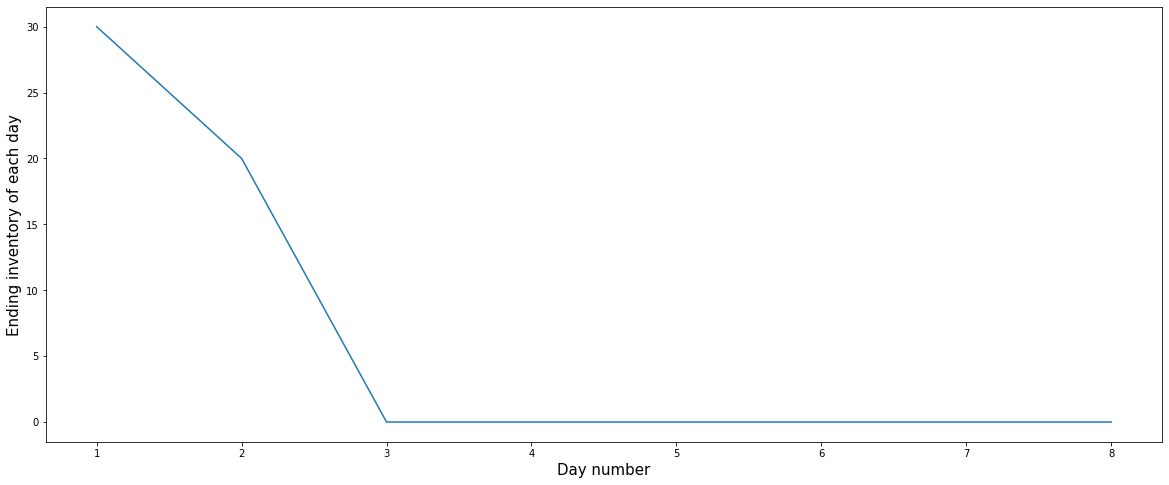

In [ ]:
# M = int(input("M : "))
# N = int(input("N : "))

#update here
M = 60 #max inventory
N = 3  #cycle days
begining_inventory = 50
days_until_order_arrives = 1
order_quantity = 10
total_days = 8


total_cycle = math.ceil(total_days/N)
theinventory = INVENTORY(M, N, begining_inventory, days_until_order_arrives, order_quantity)
theinventory.simulation(total_cycle, total_days)